Machine Learning

In [1]:
import numpy as np
import pandas as pd      
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype 

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

1.Read a csvfile into a dataframe

In [2]:
diab0_df = pd.read_csv('diabetes2.csv', delim_whitespace=False)
print diab0_df.head(5)
print
print diab0_df.describe()

   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     1

2. Cleaning data

In [3]:
diab_ml = diab0_df.copy(deep=True)
diab_ml['plas'].replace(0,np.NaN, inplace = True)
diab_ml['pres'].replace(0,np.NaN, inplace = True)
diab_ml['skin'].replace(0,np.NaN, inplace = True)
diab_ml['insu'].replace(0,np.NaN, inplace = True)
diab_ml['mass'].replace(0,np.NaN, inplace = True)
print diab_ml.describe()

             preg        plas        pres        skin        insu        mass  \
count  768.000000  763.000000  733.000000  541.000000  394.000000  757.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.535641   12.382158   10.476982  118.775855    6.924988   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [4]:
print diab_ml.isnull().sum(axis=0)
# Drop 'skin' and 'insu'
diab_ml = diab_ml.drop(['insu','skin'],axis=1)
print diab_ml.head(5)
print diab_ml.describe()

preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64
   preg   plas  pres  mass   pedi  age  class
0     6  148.0  72.0  33.6  0.627   50      1
1     1   85.0  66.0  26.6  0.351   31      0
2     8  183.0  64.0  23.3  0.672   32      1
3     1   89.0  66.0  28.1  0.167   21      0
4     0  137.0  40.0  43.1  2.288   33      1
             preg        plas        pres        mass        pedi         age  \
count  768.000000  763.000000  733.000000  757.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   32.457464    0.471876   33.240885   
std      3.369578   30.535641   12.382158    6.924988    0.331329   11.760232   
min      0.000000   44.000000   24.000000   18.200000    0.078000   21.000000   
25%      1.000000   99.000000   64.000000   27.500000    0.243750   24.000000   
50%      3.000000  117.000000   72.000000   32.300000    0.372500   29.000000   
75%      6.000000  141.0000

3. Split X attributes and y target, split into train and test sets

In [5]:
X = diab_ml.drop(labels=['class'], axis=1)
print X
y = diab_ml.loc[:,'class'] 
print y
print y.unique()
X_col_names = X.columns.values
print X_col_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

     preg   plas  pres  mass   pedi  age
0       6  148.0  72.0  33.6  0.627   50
1       1   85.0  66.0  26.6  0.351   31
2       8  183.0  64.0  23.3  0.672   32
3       1   89.0  66.0  28.1  0.167   21
4       0  137.0  40.0  43.1  2.288   33
5       5  116.0  74.0  25.6  0.201   30
6       3   78.0  50.0  31.0  0.248   26
7      10  115.0   NaN  35.3  0.134   29
8       2  197.0  70.0  30.5  0.158   53
9       8  125.0  96.0   NaN  0.232   54
10      4  110.0  92.0  37.6  0.191   30
11     10  168.0  74.0  38.0  0.537   34
12     10  139.0  80.0  27.1  1.441   57
13      1  189.0  60.0  30.1  0.398   59
14      5  166.0  72.0  25.8  0.587   51
15      7  100.0   NaN  30.0  0.484   32
16      0  118.0  84.0  45.8  0.551   31
17      7  107.0  74.0  29.6  0.254   31
18      1  103.0  30.0  43.3  0.183   33
19      1  115.0  70.0  34.6  0.529   32
20      3  126.0  88.0  39.3  0.704   27
21      8   99.0  84.0  35.4  0.388   50
22      7  196.0  90.0  39.8  0.451   41
23      9  119.0

3. Imputation

In [6]:
imp_x = Imputer(missing_values='NaN', strategy='mean', axis=0) 
X_train = imp_x.fit_transform(X_train)
X_test = imp_x.transform(X_test) 
print len(y_train)

614


/Users/jill/anaconda3/envs/biopy/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


4. Pridiction-- "rbf" kernel

In [7]:
# Prediction by default
svc0 = SVC(kernel='rbf', class_weight='balanced', probability=True) 
print svc0
clf0 = svc0.fit(X_train, y_train) 
y_pred0 = svc0.predict(X_test) 
pTot0 = accuracy_score(y_test, y_pred0)
print "Prediction accuracy: ",pTot0

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.6428571428571429


/Users/jill/anaconda3/envs/biopy/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
cm0 = confusion_matrix(y_test, y_pred0)
cm0

array([[99,  1],
       [54,  0]])

In [9]:
report0 = classification_report(y_test, y_pred0)
print report0

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       100
           1       0.00      0.00      0.00        54

   micro avg       0.64      0.64      0.64       154
   macro avg       0.32      0.49      0.39       154
weighted avg       0.42      0.64      0.51       154



In [10]:
# Scale data with ML
print X_test 
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)# fit AND transform training set
X_test_minmax = min_max_scaler.transform(X_test)# test set transform only, no fit
print X_test_minmax 

[[4.00000000e+00 9.90000000e+01 7.20000000e+01 2.56000000e+01
  2.94000000e-01 2.80000000e+01]
 [1.00000000e+00 1.43000000e+02 7.40000000e+01 2.62000000e+01
  2.56000000e-01 2.10000000e+01]
 [1.00000000e+00 8.90000000e+01 7.60000000e+01 3.12000000e+01
  1.92000000e-01 2.30000000e+01]
 [7.00000000e+00 1.19000000e+02 7.23118644e+01 2.52000000e+01
  2.09000000e-01 3.70000000e+01]
 [5.00000000e+00 1.26000000e+02 7.80000000e+01 2.96000000e+01
  4.39000000e-01 4.00000000e+01]
 [6.00000000e+00 1.14000000e+02 8.80000000e+01 2.78000000e+01
  2.47000000e-01 6.60000000e+01]
 [1.00000000e+00 9.20000000e+01 6.20000000e+01 1.95000000e+01
  4.82000000e-01 2.50000000e+01]
 [1.00000000e+00 1.09000000e+02 3.80000000e+01 2.31000000e+01
  4.07000000e-01 2.60000000e+01]
 [1.00000000e+00 1.72000000e+02 6.80000000e+01 4.24000000e+01
  7.02000000e-01 2.80000000e+01]
 [0.00000000e+00 1.02000000e+02 5.20000000e+01 2.51000000e+01
  7.80000000e-02 2.10000000e+01]
 [4.00000000e+00 9.20000000e+01 8.00000000e+01 4.2

In [11]:
svc_s = SVC(kernel='rbf', class_weight='balanced', probability=True) 
print svc_s 
clf_s = svc_s.fit(X_train_minmax, y_train) 
y_pred_minmax_s = svc_s.predict(X_test_minmax) 
pTot_s = accuracy_score(y_test, y_pred_minmax_s)
print "Prediction accuracy: ",pTot_s

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7272727272727273


In [12]:
cm_s = confusion_matrix(y_test, y_pred_minmax_s)
print cm_s
report_s = classification_report(y_test, y_pred_minmax_s)
print report_s

[[77 23]
 [19 35]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       100
           1       0.60      0.65      0.62        54

   micro avg       0.73      0.73      0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [14]:
# Parameter tuning 
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.01, .1, 1, 'auto', 10, 100]
param_grid = dict(gamma=gamma_range, C=C_range)

In [15]:
grid = GridSearchCV(SVC(kernel='rbf',class_weight='balanced', probability=True), param_grid=param_grid)  
grid.fit(X_train_minmax, y_train)
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print best_C,best_gamma
grid.best_estimator_

/Users/jill/anaconda3/envs/biopy/lib/python2.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


10.0 auto


/Users/jill/anaconda3/envs/biopy/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svc_rbf = SVC(C=10.0, kernel='rbf', class_weight='balanced',cache_size=200,gamma = 'auto', probability=True) 
print svc_rbf 
clf = svc_rbf.fit(X_train_minmax, y_train) 
y_pred_minmax = svc_rbf.predict(X_test_minmax) 
pTot = accuracy_score(y_test, y_pred_minmax)
print "Prediction accuracy: ",pTot

SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.7532467532467533


In [17]:
cm_rbf = confusion_matrix(y_test, y_pred_minmax)
print cm_rbf
report_rbf = classification_report(y_test, y_pred_minmax)
print report_rbf

[[80 20]
 [18 36]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.64      0.67      0.65        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.75      0.75       154



6. Plot ROC curve("rbf" kernel)

In [18]:
%matplotlib inline

In [19]:
probas_ = svc_rbf.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  
roc_auc = auc(fpr, tpr)
print "thresholds", thresholds
print "probas_", probas_
print "AUC using predict_proba", roc_auc

thresholds [1.95532655 0.95532655 0.92916858 0.92821552 0.80845943 0.79246894
 0.74084671 0.73968508 0.73819828 0.73342131 0.68126778 0.67824365
 0.61668626 0.57918692 0.57542318 0.52153388 0.51952745 0.51166324
 0.49204187 0.46947724 0.45511355 0.43803158 0.43388487 0.42050835
 0.38237237 0.38186044 0.38059947 0.36081003 0.34929118 0.33896785
 0.33349137 0.31875923 0.30968028 0.30303348 0.30299488 0.30063003
 0.27912018 0.27303378 0.25498725 0.25413029 0.23384752 0.22849046
 0.22684738 0.21716361 0.21280924 0.2004138  0.19480823 0.15262621
 0.14917198 0.14019891 0.13498889 0.10745894 0.09550926 0.03601469
 0.03404414 0.02126831]
probas_ [[0.92514298 0.07485702]
 [0.82878485 0.17121515]
 [0.95973471 0.04026529]
 [0.78734605 0.21265395]
 [0.61813956 0.38186044]
 [0.81381511 0.18618489]
 [0.97509565 0.02490435]
 [0.95171887 0.04828113]
 [0.18223082 0.81776918]
 [0.97712742 0.02287258]
 [0.81150061 0.18849939]
 [0.95500287 0.04499713]
 [0.24843342 0.75156658]
 [0.969045   0.030955  ]
 [0.

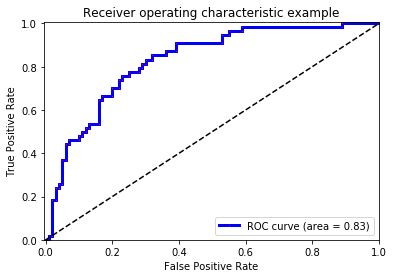

In [20]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

5. Pridiction-- "polynomial" kernel

In [21]:
# Pridiction by defaule
svc_p_0 = SVC(kernel='poly', class_weight='balanced', degree = 2, probability=True)  
print svc_p_0
clf_p_0 = svc_p_0.fit(X_train, y_train)
y_pred_p_0 = svc_p_0.predict(X_test) 
pTot_p_0 = accuracy_score(y_test, y_pred_p_0)
print "Prediction accuracy: ",pTot_p_0

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7337662337662337


In [22]:
cm_p_0 = confusion_matrix(y_test, y_pred_p_0)
cm_p_0

array([[69, 31],
       [10, 44]])

In [23]:
report_p_0 = classification_report(y_test, y_pred_p_0)
print report_p_0 

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       100
           1       0.59      0.81      0.68        54

   micro avg       0.73      0.73      0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



In [24]:
# Sclae data with ML
print X_test 
min_max_scaler = MinMaxScaler()
X_train_minmax_p = min_max_scaler.fit_transform(X_train)
X_test_minmax_p = min_max_scaler.transform(X_test)
X_test_minmax_p 

[[4.00000000e+00 9.90000000e+01 7.20000000e+01 2.56000000e+01
  2.94000000e-01 2.80000000e+01]
 [1.00000000e+00 1.43000000e+02 7.40000000e+01 2.62000000e+01
  2.56000000e-01 2.10000000e+01]
 [1.00000000e+00 8.90000000e+01 7.60000000e+01 3.12000000e+01
  1.92000000e-01 2.30000000e+01]
 [7.00000000e+00 1.19000000e+02 7.23118644e+01 2.52000000e+01
  2.09000000e-01 3.70000000e+01]
 [5.00000000e+00 1.26000000e+02 7.80000000e+01 2.96000000e+01
  4.39000000e-01 4.00000000e+01]
 [6.00000000e+00 1.14000000e+02 8.80000000e+01 2.78000000e+01
  2.47000000e-01 6.60000000e+01]
 [1.00000000e+00 9.20000000e+01 6.20000000e+01 1.95000000e+01
  4.82000000e-01 2.50000000e+01]
 [1.00000000e+00 1.09000000e+02 3.80000000e+01 2.31000000e+01
  4.07000000e-01 2.60000000e+01]
 [1.00000000e+00 1.72000000e+02 6.80000000e+01 4.24000000e+01
  7.02000000e-01 2.80000000e+01]
 [0.00000000e+00 1.02000000e+02 5.20000000e+01 2.51000000e+01
  7.80000000e-02 2.10000000e+01]
 [4.00000000e+00 9.20000000e+01 8.00000000e+01 4.2

array([[ 0.23529412,  0.35483871,  0.525     ,  0.15132924,  0.08989726,
         0.11666667],
       [ 0.05882353,  0.63870968,  0.55      ,  0.16359918,  0.07363014,
         0.        ],
       [ 0.05882353,  0.29032258,  0.575     ,  0.26584867,  0.04623288,
         0.03333333],
       [ 0.41176471,  0.48387097,  0.52889831,  0.14314928,  0.05351027,
         0.26666667],
       [ 0.29411765,  0.52903226,  0.6       ,  0.23312883,  0.15196918,
         0.31666667],
       [ 0.35294118,  0.4516129 ,  0.725     ,  0.19631902,  0.0697774 ,
         0.75      ],
       [ 0.05882353,  0.30967742,  0.4       ,  0.02658487,  0.17037671,
         0.06666667],
       [ 0.05882353,  0.41935484,  0.1       ,  0.1002045 ,  0.13827055,
         0.08333333],
       [ 0.05882353,  0.82580645,  0.475     ,  0.49488753,  0.26455479,
         0.11666667],
       [ 0.        ,  0.37419355,  0.275     ,  0.14110429, -0.00256849,
         0.        ],
       [ 0.23529412,  0.30967742,  0.625     ,  0.

In [25]:
svc_p_s = SVC(kernel='poly', class_weight='balanced',degree = 2, probability=True) 
print svc_p_s
clf_p_s = svc_p_s.fit(X_train_minmax_p, y_train) 
y_pred_minmax_p = svc_p_s.predict(X_test_minmax_p) 
pTot_p_s = accuracy_score(y_test, y_pred_minmax_p)
print "Prediction accuracy: ",pTot_p_s

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7467532467532467


In [26]:
cm_s_2 = confusion_matrix(y_test, y_pred_minmax_p)
cm_s_2

array([[84, 16],
       [23, 31]])

In [27]:
report_s_2 = classification_report(y_test, y_pred_minmax_p)
print report_s_2

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



In [28]:
# Parameter tuning
C_range2 = 10.0 ** np.arange(-2, 4)
degree_range = [1, 2, 3]
param_grid2 = dict(degree=degree_range, C=C_range2)

In [29]:
grid_poly = GridSearchCV(SVC(kernel='poly', probability=True), param_grid=param_grid2)  
grid_poly.fit(X_train_minmax_p, y_train)
best_C_poly = grid_poly.best_estimator_.C
best_gamma_poly = grid_poly.best_estimator_.gamma
print best_C_poly,best_gamma_poly
grid_poly.best_estimator_

10.0 auto_deprecated


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
svc_poly = SVC(C=10.0, kernel='poly', class_weight='balanced', gamma ='auto_deprecated',  probability=True) 
print svc_poly 
clf2 = svc_poly.fit(X_train_minmax_p, y_train) 
y_pred_minmax2 = svc_poly.predict(X_test_minmax_p) 
pTot2 = accuracy_score(y_test, y_pred_minmax2)
print "Prediction accuracy: ",pTot2

SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7532467532467533


In [32]:
cm_poly = confusion_matrix(y_test, y_pred_minmax2)
print cm_poly
report_poly = classification_report(y_test, y_pred_minmax2)
print report_poly

[[86 14]
 [24 30]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [34]:
probas_poly = svc_poly.fit(X_train_minmax_p, y_train).predict_proba(X_test_minmax_p)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas_poly[:, 1])  
roc_auc2 = auc(fpr2, tpr2)
print "thresholds", thresholds2
print "probas_poly", probas_poly
print "AUC using predict_proba", roc_auc2

thresholds [1.99225769 0.99225769 0.98100735 0.98049773 0.78413692 0.75353867
 0.70872348 0.69603818 0.68243461 0.66992326 0.64908223 0.63578729
 0.61107394 0.59710074 0.56047437 0.53114909 0.51024487 0.47705977
 0.47472081 0.4692792  0.43145332 0.42783227 0.38862978 0.37928383
 0.37518597 0.32897338 0.31737714 0.30233187 0.29616019 0.29399262
 0.28324682 0.2701863  0.26754915 0.26595024 0.26548701 0.26353256
 0.26194167 0.25860955 0.25855764 0.25032204 0.2483445  0.24813014
 0.23441919 0.21350345 0.21253062 0.20221164 0.20040579 0.18878549
 0.1883252  0.17993808 0.1762595  0.17372244 0.1731875  0.16950035
 0.16329024 0.14127214 0.13980303 0.13382474 0.13266839 0.10263779
 0.10214451 0.09151522]
probas_poly [[0.86296105 0.13703895]
 [0.78297232 0.21702768]
 [0.88227835 0.11772165]
 [0.77376108 0.22623892]
 [0.67102662 0.32897338]
 [0.6552744  0.3447256 ]
 [0.89736221 0.10263779]
 [0.89526246 0.10473754]
 [0.29127652 0.70872348]
 [0.89888218 0.10111782]
 [0.80146232 0.19853768]
 [0.8816

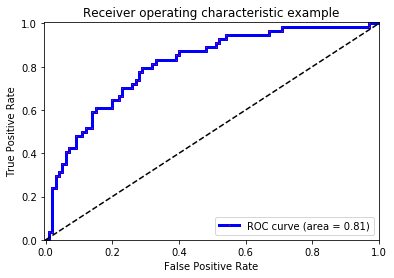

In [35]:
plt.figure()
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()